# Predicting Used Cars Prices Using Machine Learning

## Problem Statement:
The used car market is highly dynamic, with prices fluctuating based on various factors like brand, model, mileage, engine type, and accident history. Currently, buyers and sellers face difficulties in determining the fair market price for a used vehicle due to the sheer complexity and number of influencing factors. The lack of accurate price prediction models leads to inefficient pricing strategies, underpricing, or overpricing of cars, which ultimately hampers market transparency and trust.

This project aims to build a predictive model that can accurately estimate the price of a used car based on its features. Such a model can be leveraged by car dealerships, individual sellers, and buyers to ensure fair transactions, improve customer satisfaction, and increase market efficiency.

## Objectives:
The primary objectives of this project are:
- To develop a machine learning model that predicts the price of a used car based on its features such as brand, model year, mileage, engine type, and accident history.
- To identify the key factors that have the greatest impact on used car prices.
- To improve the accuracy of price estimation over traditional pricing models or manual pricing strategies.

## Data Description:
The dataset used for this project contains information on used cars and their respective prices, gathered from an online car marketplace. It includes two sets: a training dataset with 188,533 records and a test dataset with 125,690 records. Both datasets contain 13 columns, which represent various features that can influence the price of a used car.

### Columns included in the dataset:
- `id`: Unique identifier for each car.
- `brand`: The car's brand (e.g., Toyota, BMW).
- `model`: The car's specific model (e.g., Corolla, X5).
- `model_year`: The year the car model was manufactured.
- `mileage`: The total distance the car has traveled (in kilometers).
- `fuel_type`: Type of fuel used by the car (e.g., gasoline, diesel, electric).  
  **Missing values:** 5,083 in the training data and 3,383 in the test data.
- `engine`: Engine size in liters.
- `transmission`: Type of transmission (e.g., automatic, manual).
- `ext_col`: Exterior color of the car.
- `int_col`: Interior color of the car.
- `accident`: Whether the car has a recorded accident history (Yes/No).  
  **Missing values:** 2,452 in the training data and 1,632 in the test data.
- `clean_title`: Whether the car has a clean title (Yes/No).  
  **Missing values:** 21,419 in the training data and 14,239 in the test data.
- `price`: The price of the car (present only in the training data).


# Import needed liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Data

In [ ]:
train_df = pd.read_csv("train.csv", index_col="id")
test_df = pd.read_csv("test(1).csv")

### Show Train & Test dataset

In [ ]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


# Exploratory Data Analysis

In [ ]:
print( "Train Dataset Shape:  ",train_df.shape)
print("Test Dataset Shape:  ", test_df.shape)

Train Dataset Shape:   (188533, 12)
Test Dataset Shape:   (125690, 12)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


# Handling Missing Values

#### 1. Finding Missing Values in Train Data
- The code calculates the percentage of missing values for each column in the training dataset (`train_df`).
- It only keeps columns with missing values and sorts them in order.
- The missing values for each column are then printed.

#### 2. Visualizing Missing Values in Train Data
- A bar plot is created to show the percentage of missing values for each feature with missing data.
- The features are shown on the x-axis, and the missing values' percentages are on the y-axis.
- The x-axis labels are rotated for easy reading.

#### 3. Finding Missing Values in Test Data
- The same process is repeated for the test dataset (`test_df`), calculating the percentage of missing values and printing them.

#### 4. Visualizing Missing Values in Test Data
- Another bar plot is created to show missing values in the test data, similar to the one for the training data.


This code helps identify which features in the training and test data have missing values and how much data is missing. It helps in deciding how to handle the missing values, whether to fill them or remove those features.


#### Train Data Missing Values

In [ ]:
missing_values=train_df.isnull().sum()/len(train_df)
missing_values=missing_values[missing_values>0]
missing_values.sort_values(inplace=True)
print("Missing Values in Train Data")
missing_values

Missing Values in Train Data


,0
accident,0.013006
fuel_type,0.026961
clean_title,0.113609


<ipython-input-14-f61f0fa72318>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values, palette="Pastel2")


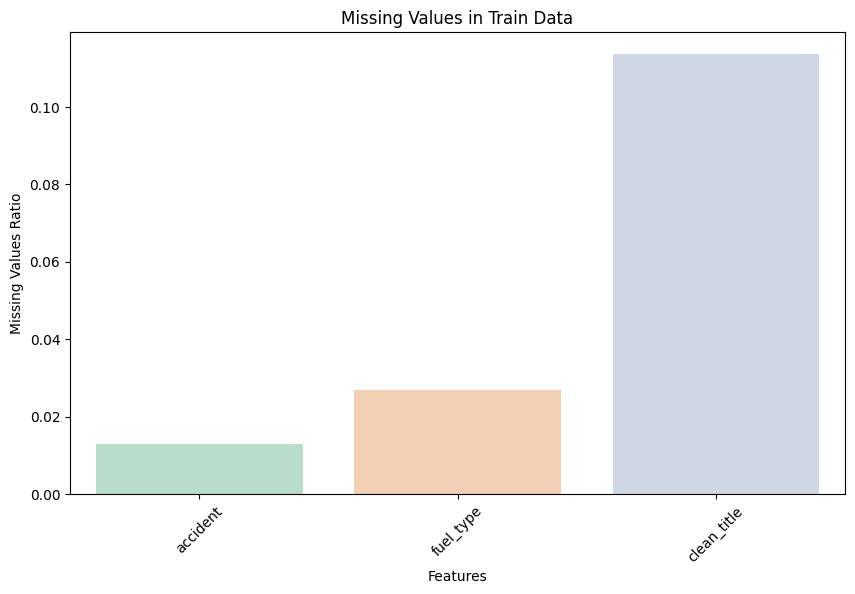

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values, palette="Pastel2")
plt.xticks(rotation=45)
plt.title("Missing Values in Train Data")
plt.xlabel("Features")
plt.ylabel("Missing Values Ratio")
plt.show()

In [ ]:
missing_values=test_df.isnull().sum()/len(test_df)
missing_values=missing_values[missing_values>0]
missing_values.sort_values(inplace=True)
print("Missing Values in Test Data")
missing_values

Missing Values in Test Data


,0
accident,0.012984
fuel_type,0.026915
clean_title,0.113287


<ipython-input-16-678fa378444e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values, palette="Pastel2")


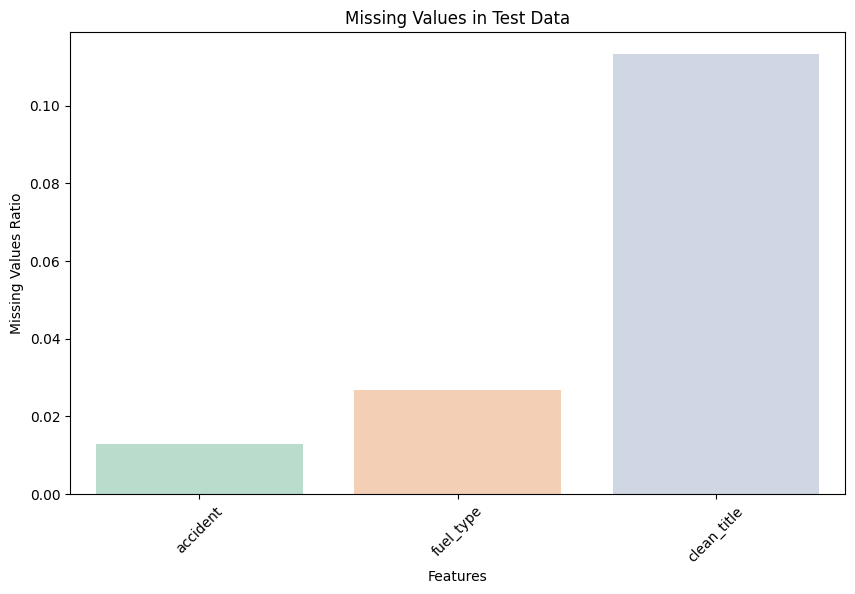

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values, palette="Pastel2")
plt.xticks(rotation=45)
plt.title("Missing Values in Test Data")
plt.xlabel("Features")
plt.ylabel("Missing Values Ratio")
plt.show()

**Filling missing values** : of Fuel column with "Electric" as Electric Cars are the type of cars that doesn't require any fuel

In [ ]:
train_df['fuel_type'] = train_df['fuel_type'].fillna('Electric')
test_df['fuel_type'] = test_df['fuel_type'].fillna('Electric')

<ipython-input-18-296b09979cbc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['fuel_type'].value_counts().values,


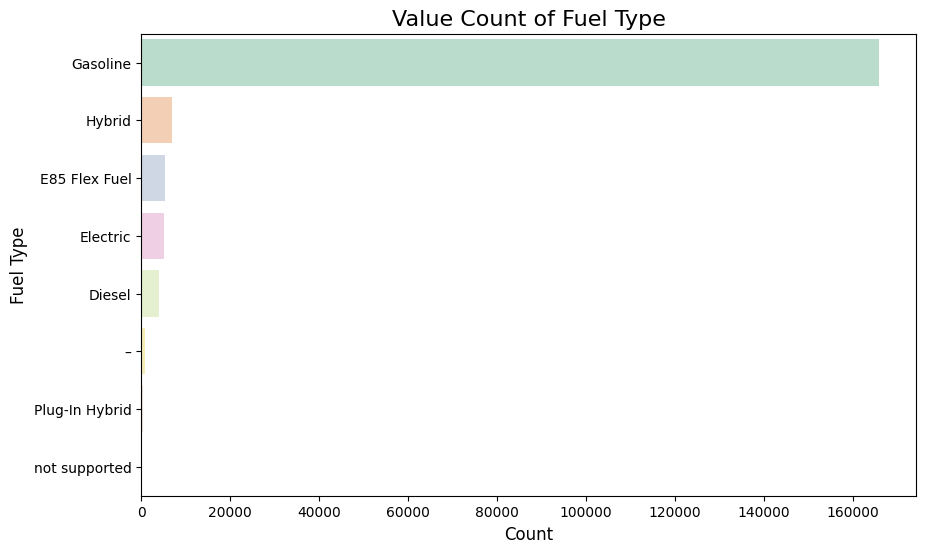

In [ ]:
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
sns.barplot(x=train_df['fuel_type'].value_counts().values,
            y=train_df['fuel_type'].value_counts().index,
            palette="Pastel2")

# Titles and labels
plt.title('Value Count of Fuel Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)

# Show the plot
plt.show()

**Filling missing values** : of clean title column with "No"

In [ ]:
train_df['clean_title'] = train_df['clean_title'].fillna('No')
test_df['clean_title'] = test_df['clean_title'].fillna('No')

<ipython-input-20-944bdc5e8f72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['clean_title'].value_counts().values,


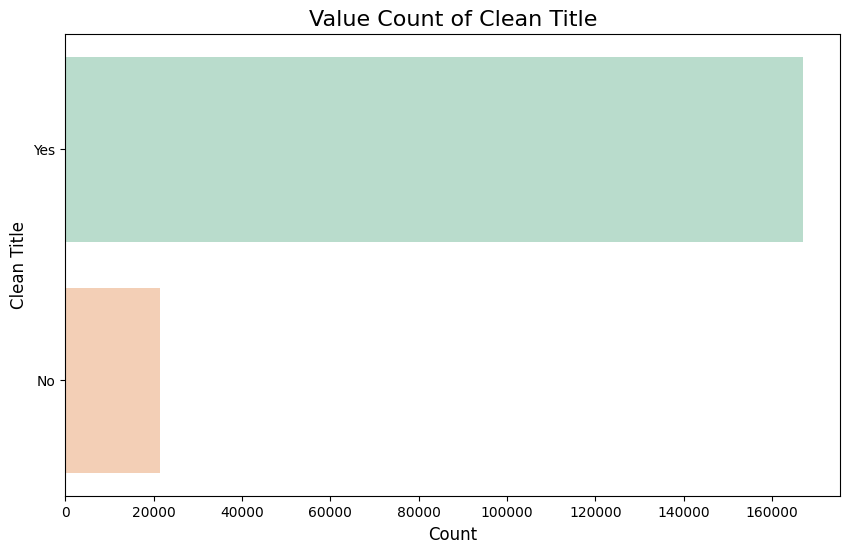

In [ ]:
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
sns.barplot(x=train_df['clean_title'].value_counts().values,
            y=train_df['clean_title'].value_counts().index,
            palette="Pastel2")

# Titles and labels
plt.title('Value Count of Clean Title', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Clean Title', fontsize=12)

# Show the plot
plt.show()

**Filling missing values** : of accident column with "None Reported" as if the acciedent is not recorded in the records then it is not reported

In [ ]:
train_df['accident'] = train_df['accident'].fillna('None reported')
test_df['accident'] = test_df['accident'].fillna('None reported')

<ipython-input-22-14459dcd1da4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['accident'].value_counts().values,


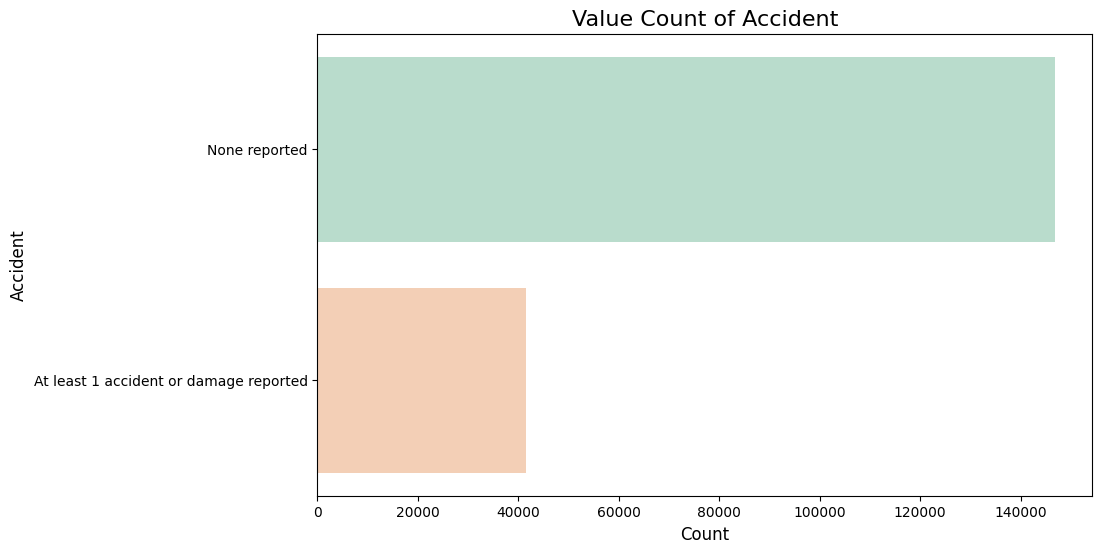

In [ ]:
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
sns.barplot(x=train_df['accident'].value_counts().values,
            y=train_df['accident'].value_counts().index,
            palette="Pastel2")

# Titles and labels
plt.title('Value Count of Accident', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Accident', fontsize=12)

# Show the plot
plt.show()

### **Now we were facing the problem of “engine features columns ” so we used the lambda expression to help us divide this column into 5 columns, each one specific to the part it represents , "Horsepower", "Displacement","Engine Type","Cylinder Count","Fuel Type".**


In [ ]:
import re
def extract_engine_features(df):
    # Extract Horsepower
    df['Horsepower'] = df['engine'].apply(lambda x: float(re.search(r'(\d+(\.\d+)?)HP', x).group(1)) if re.search(r'(\d+(\.\d+)?)HP', x) else None)

    # Extract Displacement
    df['Displacement'] = df['engine'].apply(lambda x: float(re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x).group(1) or re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x).group(2)) if re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x) else None)

    # Extract Engine Type
    df['Engine Type'] = df['engine'].apply(lambda x: re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', x).group(1) if re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', x) else None)

    # Extract Cylinder Count
    df['Cylinder Count'] = df['engine'].apply(lambda x: int(re.search(r'(\d+) Cylinder', x).group(1)) if re.search(r'(\d+) Cylinder', x) else None)

    # Extract Fuel Type
    fuel_types = ['Gasoline', 'Diesel', 'Electric', 'Hybrid', 'Flex Fuel']
    df['Fuel Type'] = df['engine'].apply(lambda x: next((fuel for fuel in fuel_types if fuel in x), None))

    return df

In [ ]:
# Applying the function to both train and test datasets
train_df = extract_engine_features(train_df)
test_df = extract_engine_features(test_df)

In [ ]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type
id,,,,,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,None,4.0,Gasoline
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,None,8.0,Gasoline
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,None,8.0,Flex Fuel
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,None,8.0,Gasoline
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,None,4.0,Gasoline


# Model age

In [ ]:
# model year
import datetime
current_year = datetime.datetime.now().year
train_df['model_age'] = current_year - train_df['model_year']
test_df['model_age'] = current_year - test_df['model_year']
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type,model_age
id,,,,,,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,None,4.0,Gasoline,17
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,None,8.0,Gasoline,22
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,None,8.0,Flex Fuel,22
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,None,8.0,Gasoline,7
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,None,4.0,Gasoline,3


In [ ]:
train_df["model"].value_counts()

,count
model,
F-150 XLT,2945
M3 Base,2229
Camaro 2SS,1709
M4 Base,1622
Mustang GT Premium,1526
...,...
ForTwo Pure,2
X5 xDrive40e,1
XLR Base,1


In [ ]:
train_df["Engine Type"].isnull().sum()

99563

# Drop unnecessary columns

In [ ]:
columns_to_drop = ['engine', 'model','model_year', 'Engine Type', 'Fuel Type','ext_col','int_col']
train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns], inplace=True)

#### 1. **Imputing Missing Values with Iterative Imputer**
- The `IterativeImputer` is used for filling missing values in more complex columns that require advanced imputation (like `Horsepower` and `Displacement`).
- **Parameters**:
  - `max_iter=10`: Limits the number of iterations to 10 to avoid long computation.
  - `tol=1e-3`: Increases the tolerance for faster convergence.
  - `random_state=0`: Ensures reproducibility.
- The imputer is applied separately to both the training (`train_df`) and test (`test_df`) datasets for the `Horsepower` and `Displacement` columns.

#### 2. **Imputing Simple Columns with Mean Value**
- For simpler columns like `Cylinder Count`, the `SimpleImputer` is used to fill missing values with the mean of the column.
- It is applied to both the training and test datasets.

#### 3. **Handling Categorical Data**
- The line `train_df["transmission"].unique()` is used to check the unique values in the `transmission` column.
- `train_df["transmission"].value_counts()` shows the count of each category in the `transmission` column to understand the distribution of this feature.


The code handles missing values in both complex and simple columns and checks the categorical `transmission` column. This helps to clean and prepare the data for modeling.


In [ ]:
# Iterative Imputer: Limit max iterations and increase tolerance
imputer = IterativeImputer(max_iter=10, tol=1e-3, random_state=0)

# Apply only to relevant columns that require more sophisticated imputation
train_df[['Horsepower', 'Displacement']] = imputer.fit_transform(train_df[['Horsepower', 'Displacement']])
test_df[['Horsepower', 'Displacement']] = imputer.transform(test_df[['Horsepower', 'Displacement']])

# Simple Imputer for less complex columns
simple_imputer = SimpleImputer(strategy='mean')
train_df['Cylinder Count'] = simple_imputer.fit_transform(train_df[['Cylinder Count']])
test_df['Cylinder Count'] = simple_imputer.transform(test_df[['Cylinder Count']])

In [ ]:
# Iterative Imputer: Limit max iterations and increase tolerance
imputer = IterativeImputer(max_iter=10, tol=1e-3, random_state=0)

# Apply only to relevant columns that require more sophisticated imputation
train_df[['Horsepower', 'Displacement']] = imputer.fit_transform(train_df[['Horsepower', 'Displacement']])
test_df[['Horsepower', 'Displacement']] = imputer.transform(test_df[['Horsepower', 'Displacement']])

# Simple Imputer for less complex columns
simple_imputer = SimpleImputer(strategy='mean')
train_df['Cylinder Count'] = simple_imputer.fit_transform(train_df[['Cylinder Count']])
test_df['Cylinder Count'] = simple_imputer.transform(test_df[['Cylinder Count']])

In [ ]:
train_df["transmission"].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [ ]:
train_df["transmission"].value_counts()

,count
transmission,
A/T,49904
8-Speed A/T,20645
Transmission w/Dual Shift Mode,19255
6-Speed A/T,18044
6-Speed M/T,11998
7-Speed A/T,11124
Automatic,10691
8-Speed Automatic,8431
10-Speed A/T,8044


#### 1. **Mapping Transmission Types with a Function**
- A custom function `map_transmission` is used to standardize and clean the `transmission` column in the dataset.

  - It checks if the input is a string; if not, it returns `'Other'` (to handle missing or non-string values).
  - If it is a string, it removes extra spaces and converts the text to lowercase.
  - It then checks for keywords in the string:
    - If the transmission contains keywords like `'a/t'` or `'automatic'`, it is mapped to `'Automatic'`.
    - If it contains `'m/t'` or `'manual'`, it is mapped to `'Manual'`.
    - If it contains `'cvt'` or `'variator'`, it is mapped to `'Variator'`.
    - If it contains `'tiptronic'`, it is mapped to `'Tiptronic'`.
    - Any other value is mapped to `'Other'`.

#### 2. **Applying the Function**
- The function is applied to the `transmission` column in both the training (`train_df`) and test (`test_df`) datasets.
  
#### 3. **Checking Mapped Values**
- After applying the function, the code prints the count of each transmission type in both the training and test datasets to ensure that the mapping is correct.


This function helps clean and standardize the `transmission` column, ensuring that different variants of the same transmission type are grouped together. It also handles missing or invalid data by labeling it as `'Other'`.







In [ ]:
# Improved transmission mapping function
def map_transmission(transmission):
    # Check if the input is a string, otherwise return 'Other' for NaN or non-string values
    if isinstance(transmission, str):
        # Standardize the input by removing leading/trailing spaces and converting to lowercase
        transmission = transmission.strip().lower()

        # Mapping conditions for different types of transmissions
        if any(kw in transmission for kw in ['a/t', 'automatic']):
            return 'Automatic'
        elif any(kw in transmission for kw in ['m/t', 'manual']):
            return 'Manual'
        elif any(kw in transmission for kw in ['cvt', 'variator']):
            return 'Variator'
        elif any(kw in transmission for kw in ['tiptronic']):
            return 'Tiptronic'
        else:
            return 'Other'
    else:
        # Return 'Other' if the value is NaN or not a string
        return 'Other'

# Apply the function to the DataFrame columns
train_df['transmission'] = train_df['transmission'].apply(map_transmission)
test_df['transmission'] = test_df['transmission'].apply(map_transmission)

# Check if there are any mismapped or unrecognized transmission types by counting unique values
print(train_df['transmission'].value_counts())
print('='*20)
print(test_df['transmission'].value_counts())

transmission
Automatic    150302
Other         19868
Manual        16358
Variator       2005
Name: count, dtype: int64
transmission
Automatic    100296
Other         13260
Manual        10785
Variator       1349
Name: count, dtype: int64


#### 1. **Mapping Columns in the Dataset**
- The function `mapping_columns(df)` is designed to replace the values in three specific columns (`accident`, `clean_title`, and `transmission`) with numerical values to make the data easier to work with for machine learning models.

#### 2. **Mapping the 'accident' Column**
- It replaces the text values in the `'accident'` column with:
  - `'At least 1 accident or damage reported'` → `1`
  - `'None reported'` → `0`
  
#### 3. **Mapping the 'clean_title' Column**
- It replaces the values in the `'clean_title'` column with:
  - `"Yes"` → `1`
  - `"No"` → `0`
  
#### 4. **Mapping the 'transmission' Column**
- It replaces the transmission types with:
  - `'Automatic'` → `1`
  - `'Manual'` → `2`
  - `'Variator'` → `3`
  - `'Other'` → `4`
  
#### 5. **Applying the Function**
- The `mapping_columns` function is applied to both the training (`train_df`) and test (`test_df`) datasets, transforming the specified columns.



This function helps convert categorical data into numerical form, which is required for many machine learning algorithms.


In [ ]:
def mapping_columns(df):
    # Replace values in the 'accident' column
    df["accident"] = df["accident"].replace({
        'At least 1 accident or damage reported': 1,
        'None reported': 0
    })

    # Replace values in the 'clean_title' column
    df["clean_title"] = df["clean_title"].replace({
        "Yes": 1,
        "No": 0
    })

    # Replace values in the 'transmission' column
    df["transmission"] = df["transmission"].replace({'Automatic':1,
                                                'Manual':2,
                                                'Variator':3,
                                                'Other':4})

    return df

train_df = mapping_columns(train_df)
test_df = mapping_columns(test_df)

<ipython-input-35-0c3ee03b273f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["accident"] = df["accident"].replace({
<ipython-input-35-0c3ee03b273f>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["clean_title"] = df["clean_title"].replace({
<ipython-input-35-0c3ee03b273f>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [ ]:
train_df.head()

,brand,milage,fuel_type,transmission,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
id,,,,,,,,,,,
0,MINI,213000,Gasoline,1,0,1,4200,172.0,1.6,4.0,17
1,Lincoln,143250,Gasoline,1,1,1,4999,252.0,3.9,8.0,22
2,Chevrolet,136731,E85 Flex Fuel,1,0,1,13900,320.0,5.3,8.0,22
3,Genesis,19500,Gasoline,4,0,1,45000,420.0,5.0,8.0,7
4,Mercedes-Benz,7388,Gasoline,1,0,1,97500,208.0,2.0,4.0,3


#### Encoding Transmission Types
- The code assigns numeric values to different transmission types:
  - `'Automatic': 1`, `'Manual': 2`, `'Variator': 3`, `'Other': 4`.
- This is essential for machine learning models that need numerical input.

#### Plotting Numeric Distributions
- A grid of 16 subplots is created to visualize the distributions of numeric columns in `train_df`.
- The `select_dtypes` function filters the numeric columns (`float64`, `int64`), and histograms are plotted using Seaborn’s `histplot`.
- Each plot includes a kernel density estimate (`kde=True`), with green as the color.
- Extra subplots are deleted to maintain a clean layout, and `plt.tight_layout()` adjusts the spacing.

This helps identify data distribution, skewness, and outliers.


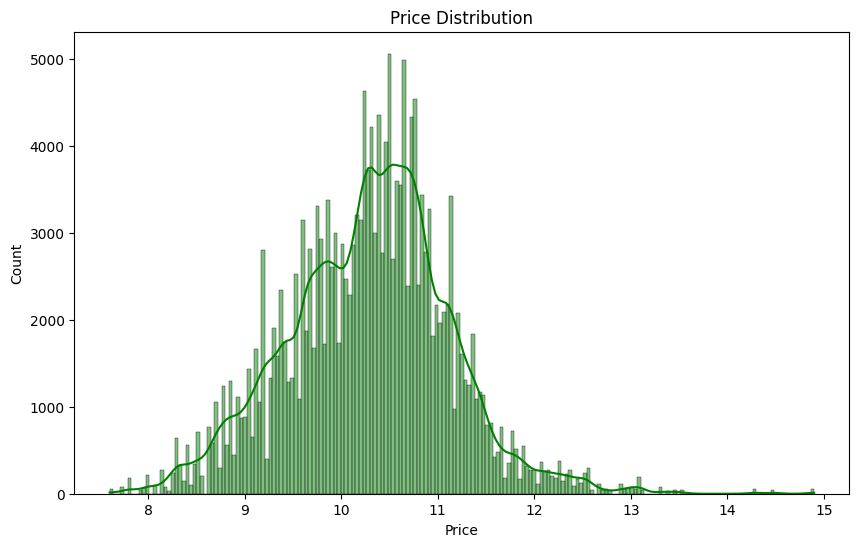

In [ ]:
# Log transform the highly skewed target variable (price)
train_df['price'] = np.log1p(train_df['price'])
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

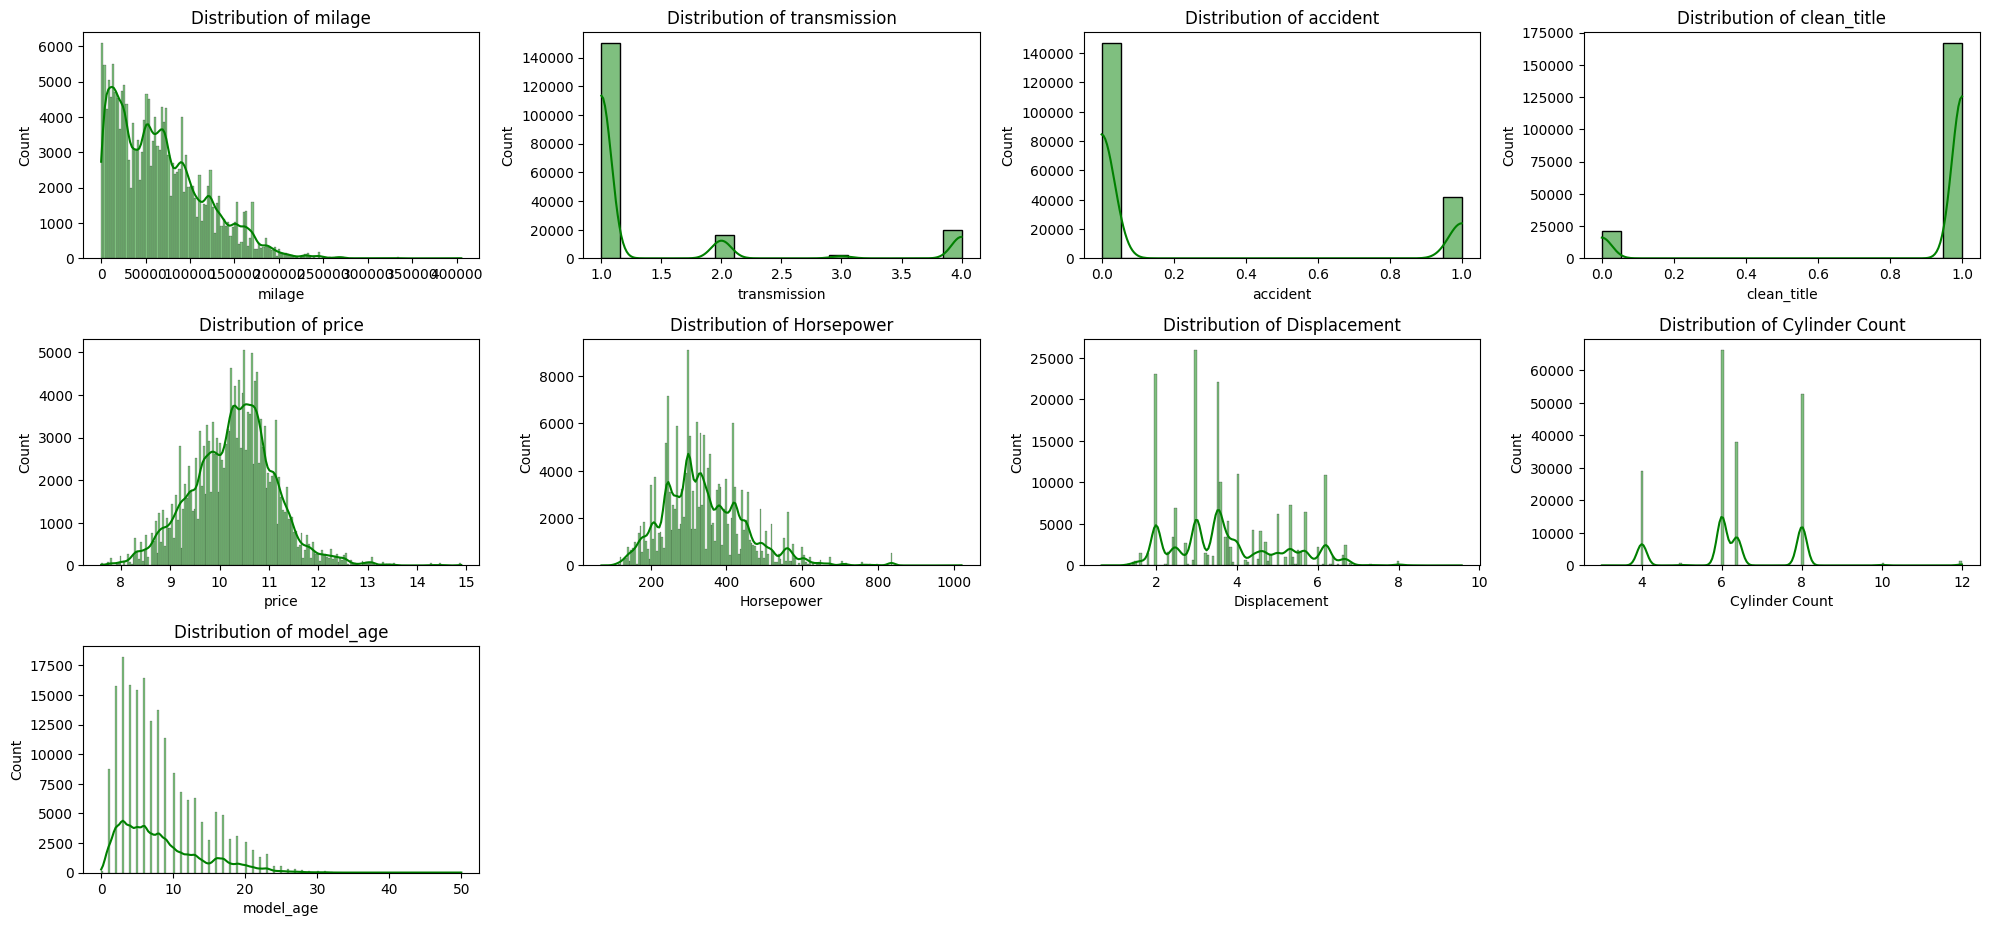

In [ ]:
# Set the number of rows and columns for the grid
n_rows = 4
n_cols = 4

# Filter numerical columns only
num_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))

# Flatten axes array to easily iterate over
axes = axes.flatten()

# Plot each numeric column in a subplot
for i, col in enumerate(num_columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

# If there are more subplots than features, remove the extra subplots
for j in range(len(num_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

#### One-Hot Encoding Categorical Columns
- The categorical columns `['brand', 'fuel_type']` are one-hot encoded to convert them into numerical format.

1. **Initialize OneHotEncoder**:
   - The `OneHotEncoder` is set to return dense output (`sparse_output=False`) and drop the first category (`drop='first'`) to avoid multicollinearity.

2. **Apply One-Hot Encoding**:
   - The encoder is applied to the categorical columns in the training and test datasets, and the transformed data is stored in new DataFrames `train_encoded` and `test_encoded`.

3. **Drop Original Categorical Columns**:
   - The original `brand` and `fuel_type` columns are removed from both datasets to avoid redundancy.

4. **Concatenate Encoded Columns**:
   - The newly one-hot encoded columns are concatenated back to the original datasets.

5. **Display the Result**:
   - The first few rows of the transformed DataFrames are displayed using `print(train_df.head())` and `print(test_df.head())`.


In [ ]:
# Columns to be one-hot encoded
categorical_columns = ['brand', 'fuel_type']

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding
train_encoded = pd.DataFrame(ohe.fit_transform(train_df[categorical_columns]),
                             columns=ohe.get_feature_names_out(categorical_columns))
test_encoded = pd.DataFrame(ohe.transform(test_df[categorical_columns]),
                            columns=ohe.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
train_df = train_df.drop(categorical_columns, axis=1)
test_df = test_df.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded columns back to the original DataFrame
train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)

# Display the new columns
print(train_df.head())
print(test_df.head())

   milage  transmission  accident  clean_title      price  Horsepower  \
0  213000             1         0            1   8.343078       172.0   
1  143250             1         1            1   8.517193       252.0   
2  136731             1         0            1   9.539716       320.0   
3   19500             4         0            1  10.714440       420.0   
4    7388             1         0            1  11.487618       208.0   

   Displacement  Cylinder Count  model_age  brand_Alfa  ...  brand_Volkswagen  \
0           1.6             4.0         17         0.0  ...               0.0   
1           3.9             8.0         22         0.0  ...               0.0   
2           5.3             8.0         22         0.0  ...               0.0   
3           5.0             8.0          7         0.0  ...               0.0   
4           2.0             4.0          3         0.0  ...               0.0   

   brand_Volvo  brand_smart  fuel_type_E85 Flex Fuel  fuel_type_Electric  

In [ ]:
x = train_df.drop(['price'],axis=1)
y = train_df['price']
x.shape, y.shape

((188533, 71), (188533,))

#### Scaling Continuous Features
- The `StandardScaler` standardizes continuous features (`milage`, `Horsepower`, etc.) to have a mean of 0 and standard deviation of 1.
- The scaler is fitted to the training data and applied consistently to the test set for uniform scaling.


In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Scale continuous features
continuous_features = ['milage', 'Horsepower', 'Displacement', 'Cylinder Count', 'model_age']
train_df[continuous_features] = scaler.fit_transform(train_df[continuous_features])

# Scale the same way for the test set
test_df[continuous_features] = scaler.transform(test_df[continuous_features])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

#### Hyperparameter Tuning and Model Evaluation

1. **Parameter Grid**:
   - A parameter grid (`param_dist_dt`) is defined for tuning the Decision Tree Regressor, specifying options for `max_depth`, `min_samples_split`, and `min_samples_leaf`.

2. **Model Initialization**:
   - A `DecisionTreeRegressor` is initialized with a fixed random state for reproducibility.

3. **Randomized Search**:
   - `RandomizedSearchCV` is used to search for the best hyperparameters over the defined grid, scoring based on negative mean squared error and using 5-fold cross-validation.

4. **Model Fitting**:
   - The model is fitted to the training data (`X_train`, `y_train`), and the best parameters are printed.

5. **Predictions and Evaluation**:
   - Predictions are made on the validation set (`X_val`).
   - The model's performance is evaluated using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared metrics, which are printed out.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the corrected parameter grid
param_dist_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 5,10,20],
}

# Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Random search over the parameter grid
random_search_dt = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_dist_dt,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

# Fit the model
random_search_dt.fit(X_train, y_train)
best_params_dt = random_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

# Predict on the test set
y_pred = random_search_dt.predict(X_val)

# Evaluate the model
rmse = np.sqrt(np.mean((y_pred - y_val)**2))  # RMSE without expm1, assuming no log transformation
mae = mean_absolute_error(y_val, y_pred)  # Calculate MAE
r_squared = r2_score(y_val, y_pred)  # Calculate R^2

print(f'Optimized Decision Tree RMSE: {rmse:.2f}')
print(f'Optimized Decision Tree MAE: {mae:.2f}')
print(f'Optimized Decision Tree R^2: {r_squared:.2f}')


Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 10}
Optimized Decision Tree RMSE: 0.51
Optimized Decision Tree MAE: 0.36
Optimized Decision Tree R^2: 0.63


#### Hyperparameter Tuning and Model Evaluation

1. **Parameter Grid**:
   - Defines a parameter grid (`param_dist_dt`) for hyperparameter tuning of the Random Forest model, including `max_depth`, `min_samples_split`, and `min_samples_leaf`.

2. **Model Initialization**:
   - Initializes a `RandomForestRegressor` with a fixed random state for reproducibility.

3. **Randomized Search**:
   - Uses `RandomizedSearchCV` to perform a random search over the parameter grid, optimizing for negative mean squared error with 5-fold cross-validation.

4. **Model Fitting**:
   - Fits the model to the training data (`X_train`, `y_train`) and prints the best hyperparameters found.

5. **Predictions and Evaluation**:
   - Predicts the target variable on the validation set (`X_val`).
   - Evaluates the model using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared metrics, and prints the results.

This approach optimizes the Random Forest model and assesses its performance on the validation data, providing insights into its predictive accuracy.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_dist_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Initialize the model
Random_tree = RandomForestRegressor(random_state=42)

# Random search over the parameter grid
random_search_dt = RandomizedSearchCV(
    estimator=Random_tree,
    param_distributions=param_dist_dt,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

# Fit the model
random_search_dt.fit(X_train, y_train)
best_params_dt = random_search_dt.best_params_
print("Best Parameters for RandomForest:", best_params_dt)

# Predict on the test set
y_pred = random_search_dt.predict(X_val)

# Evaluate the model
rmse = np.sqrt(np.mean((np.expm1(y_pred) - np.expm1(y_val))**2))
mae = mean_absolute_error(y_val, y_pred)  # Calculate MAE
r_squared = r2_score(y_val, y_pred)  # Calculate R^2

print(f'Optimized RandomForest RMSE: {rmse:.2f}')
print(f'Optimized RandomForest MAE: {mae:.2f}')
print(f'Optimized RandomForest R^2: {r_squared:.2f}')


Best Parameters for RandomForest: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 10}
Optimized RandomForest RMSE: 69098.21
Optimized RandomForest MAE: 0.35
Optimized RandomForest R^2: 0.65


#### Training and Evaluating SVR Model
1. **Model Initialization**:
   - Initializes a `Support Vector Regressor` (`SVR`) model.

2. **Model Training**:
   - Fits the SVR model to the training data (`X_train`, `y_train`).

3. **Predictions**:
   - Makes predictions on the validation set (`X_val`).

4. **Model Evaluation**:
   - Calculates the Mean Absolute Error (MAE) and R-squared metrics to evaluate the model's performance against the true values (`y_val`).

This code provides a straightforward way to train an SVR model and assess its accuracy using commonly used regression metrics.

In [ ]:
from sklearn.svm import SVR
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svr = svr_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_svr)  # Calculate MAE
r_squared = r2_score(y_val, y_pred_svr)

In [ ]:
rmse = np.sqrt(np.mean((np.expm1(y_pred_svr) - np.expm1(y_val))**2))
mae = mean_absolute_error(y_val, y_pred_svr)  # Calculate MAE
r_squared = r2_score(y_val, y_pred_svr)  # Calculate R^2

print(f'Optimized svr RMSE: {rmse:.2f}')
print(f'Optimized svr MAE: {mae:.2f}')
print(f'Optimized svr R^2: {r_squared:.2f}')


Optimized svr RMSE: 71018.67
Optimized svr MAE: 0.42
Optimized svr R^2: 0.53


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your existing code for data loading, preprocessing, etc.) ...

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R-squared: {r2}")

# ... (Rest of your code) ...

Linear Regression RMSE: 0.5259874110156805
Linear Regression R-squared: 0.6135904158628668
